## 2. Choosing the right estimator/algorithm for our problem

* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
* Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

###  2.1 Picking a machine learning model for a regression problem

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Import the Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;# imports as dictionary

In [6]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
len(boston_df)

506

In [8]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.6662221670168519

## Try EnsembleRegressors

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.



Decision Tree algorithm

In [9]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8654448653350507

## 2.2 A ML model for a classification problem

In [10]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
# Import LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

Tips:

1. if you have structured data, use ensemble methods
2. if you have unstructured data, sue deep leanring or transfer learning

## 3. Fit the model to data in order to make predictions

### 3.1 Fitting a model to data
* X = features, features variables, data
* y = labels, targets, target variables

In [12]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

## 3.2 Predicting with the model
Scikit learn gives two common and useful functions

1. predict()
2. predict_proba()

In [13]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [14]:
# use a trained model to predict
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [15]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

model.score takes and features and targets as input but accuracy_score takes prediction and testing_values as an input. But both of them outputs the same thing accuracy. 

In [17]:
# For the predict() function to work, it must be passed X (data) in the same format the model was trained on. 
# Anything different and it will return an error. 
# predict_proba() returns the probabilities of a classification label.

# Return probabilities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [18]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [19]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating a model

Scikit-Learn implements 3 different methods of evaluating models.

1. The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

### 4.1 General Model evaluation with score()

In [20]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);


Fit the model first on the training data before using the score() method

In [21]:
# Check the score of the model (on the test set)

#THE HIGHEST VALUE FOR THE .SCORE METHOD IS 1.0 -> MEAN ACCURACY
clf.score(X_test, y_test)

0.8524590163934426

In [22]:
# Do the same for the boston data:

# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

Coefficient de détermination , This is the R^2 value

In [23]:
# Check score

model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating the models using the scoring parameter

There are 3 different APIs for evaluating the quality of a model’s predictions:

* Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.

* Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

* Metric functions: The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

In [24]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [25]:
# Using score() , mean accuracy 
clf.score(X_test, y_test)

0.8524590163934426

In [26]:
# Using cross_val_score()
sum_score = cross_val_score(clf, X, y)
sum_score
# you can change the number of cross validations by cv=n
# For example: 
# cross_val_score(clf, X, y, cv=3)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [27]:
sum_score.mean()

0.811639344262295

In [28]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

!["crossValidation"](./images/crossvalidation.png)

In [29]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [30]:
cross_val_score(clf, X, y, cv=5) 

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

## 4.2.1 Classification model evaluation metrics


* Accuracy
* Area under ROC curve
* Confusion Matrix
* Classification Report

In [31]:
## Let's have a look at each of these. 
#  We'll bring down the classification code from above to go through some examples.

# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

Accuracy

Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [32]:
cross_val_score= cross_val_score(clf, X, y, cv=5) 


In [33]:
np.mean(cross_val_score)

0.811639344262295

In [34]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


**Area Under Receiver Operating Characteristic (ROC) Curve**

If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [35]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [36]:
y_probs

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [37]:
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

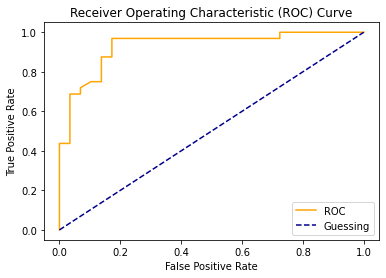

In [38]:
# Let's visualize this to make sense of it
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

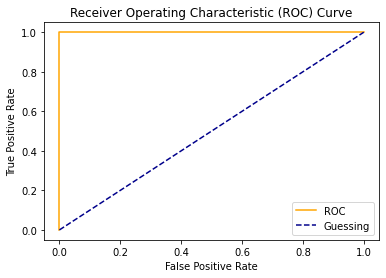

In [39]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

**gini coefficient model**

In a nutshell, what you should remember is:

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
- The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.
- The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

## Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [40]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [41]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


![confusion matrix](./images/confusionMatrix.png)

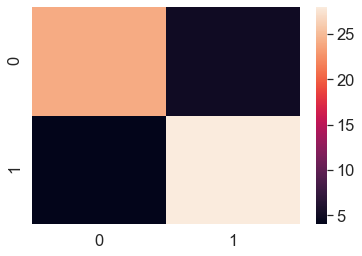

In [42]:
## A nicer way is using the heatmap() from Seaborn
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

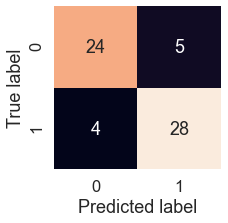

In [43]:
# Add better communation in the plot;
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

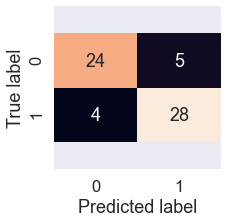

In [44]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(conf_mat)

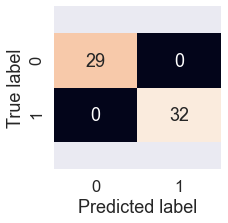

In [45]:
# Create perfect confusion matrix
perfect_conf_mat = confusion_matrix(y_test, y_test)
plot_conf_mat(perfect_conf_mat)

**New Version↓↓↓↓↓**

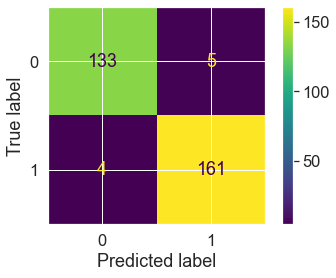

In [46]:
# Scikit learn has it's own method for plotting a confusion matrix; plot_confusiom_matrix()
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

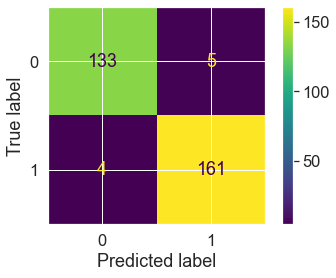

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

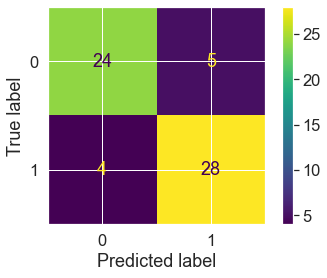

In [48]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

### Classification Report
A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's classification_report() function.

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [50]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Regression model evaluation metrics
* What R-squared does: Compares your model predictions to the mean of the targets.
* Values can range from negative infinity (a very poor model) to 1.
* For example, if all your model does is predicting the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it 's R^2 value would be 1.

* R^2 (r-squared) or coefficient of determination. → Maximize
* Mean Absolute Error (MAE) → Minimize
* Mean Squared Error (MSE) → Minimize

In [51]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [52]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8654448653350507

In [53]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [54]:
# And a perfect model would score 1
r2_score(y_test, y_test)


1.0

In [55]:
from sklearn.metrics import r2_score
y_preds = model.predict(X_test)
r2_score(y_test, y_preds) #Can indicate how well the model is predicting, but can't give how far the prediction is => MAE


0.8654448653350507

**For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE**

### Mean Absolute Error (MAE)

* MAE is the average of the absolute diff btw predictions and actual values.
* MAE gives a better indication of how far off each of your model's predictions are on average.

In [56]:
# A model's mean absolute error can be calculated with 
# Scikit-Learn's mean_absolute_error() function.
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test) #prediction with unseen 
mae = mean_absolute_error(y_test, y_preds)
mae
# 2.13 means 2.13 units away from the actual value

2.136382352941176

* Our model achieves an MAE of 2.123. This means, on average our models predictions are 2.123 units away from the actual value.

In [57]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


In [58]:
#MAE using formulas and differences
np.abs(df["differences"]).mean()

2.136382352941176

### Mean Squared Error (MSE)

* MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

In [59]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds) #9.867437068627442

#Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean() #9.867437068627439

9.867437068627439

## Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

**Classification Model Evaluation Metrics/Techniques**

* `Accuracy` - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* `Precision` - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* `Recall` - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* `F1 score` - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* `Confusion matrix` - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* `Cross-validation` - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* `Classification report` - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

* `ROC Curve` - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

* `Area Under Curve (AUC) Score` - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.


**Which classification metric should you use?**

* `Accuracy` is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* `Precision` and recall become more important when classes are imbalanced.

* If false-positive predictions are worse than false-negatives, aim for higher precision.

* If false-negative predictions are worse than false-positives, aim for higher recall.

* F1-score is a combination of precision and recall.

* A confusion matrix is always a good way to visualize how a classification model is going.



**Regression Model Evaluation Metrics/Techniques**

* `R^2 (pronounced r-squared) or the coefficient of determination`- Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* `Mean absolute error (MAE)` - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* `Mean squared error (MSE)` - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use?**

* `R2` is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* `MAE` gives a better indication of how far off each of your model's predictions are on average.

* As for `MAE` or `MSE`, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

    * Pay more attention to MAE: When being $10,000 off is `twice` as bad as being $5,000 off.

    * Pay more attention to MSE: When being $10,000 off is `more than twice` as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

## 4.2.3 Using a scoring parameter finally

In [60]:
# Use cross_val_score again
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [61]:
# The default first, which is accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

Averaging this gives the cross-validated accuracy.

In [62]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


We can find the same using the scoring parameter and passing it "accuracy".

In [63]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


The same goes for the other metrics we've been using for classification.

Let's try "precision".

In [69]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [70]:
# Use precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [71]:
# Use recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [72]:
# The f1 score
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


We can repeat this process with our regression metrics.

Let's revisit our regression model.

In [73]:
# We can repeat theis for our regression metrics
# Our regression model;
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

Default r2

In [74]:
# Default r2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.62


In [75]:
# we can use the "neg_mean_absolute_error" for MAE
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")
# Closer to 0 is better; -3.03

The cross-validated MAE score is: -3.03


Why the "neg_"?

Because Scikit-Learn documentation states:

"All scorer objects follow the convention that higher return values are better than lower return values."

Which in this case, means a lower negative value (closer to 0) is better.

What about "neg_mean_squared_error" for MSE (mean squared error)?

In [76]:
# The same for MSE, neg_mean_squared_error
np.random.seed(42)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -21.26


### 4.3 Using different evaluation metrics with Scikit-Learn

Remember the third way of evaluating Scikit-Learn functions?

> Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

Classification functions
For:

* Accuracy we can use accuracy_score()
* Precision we can use precision_score()
* Recall we can use recall_score()
* F1 we can use f1_score()

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


The same goes for the regression problem.

Regression metrics
For:

* R^2 we can use r2_score()
* MAE (mean absolute error) we can use mean_absolute_error()
* MSE (mean squared error) we can use mean_squared_error()

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.87
MAE: 2.14
MSE: 9.87


Wow. We've covered a lot. But it's worth it. Because evaluating a model's predictions is paramount in any machine learning project.

There's nothing worse than training a machine learning model and optimizing for the wrong evaluation metric.

Keep the metrics and evaluation methods we've gone through when training your future models.

If you're after extra reading, I'd go through the Scikit-Learn documentation for evaluation metrics.

Now we've seen some different metrics we can use to evaluate a model, let's see some ways we can improve those metrics.

## 5. Improving model predictions through experimentation (hyperparameter tuning)

First predictions = baseline predictions First model = baseline model

From a data perspective:

* Could we collect mroe data? (generally, the more data the better)
* Could we improve our data? (Stragetically, filling missing values or better encoding)

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model that you can adjust to improve its ability to find patterns

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [83]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [85]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
